# Data Wrangling and Cleaning Project

Hazel Cheng

Run the following two cells to setup the notebook and datasets

In [ ]:
from penngrader.grader import *

# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math

In [ ]:
!wget -nc https://storage.googleapis.com/penn-cis5450/flights.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/airports.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/airlines.csv

File ‘flights.csv’ already there; not retrieving.

File ‘airports.csv’ already there; not retrieving.

File ‘airlines.csv’ already there; not retrieving.



#Part 1: Working with Flight Data 

Let's first load our dataset into a Pandas Dataframe. 

#### **TODO**
- Save the Flights dataframe to a variable named: <code>flights_df</code>
- Save the Airports dataframe to a variable named: <code>airports_df</code>
- Save the Airlines dataframe to a variable named: <code>airlines_df</code>

In [ ]:
flights_df = pd.read_csv('flights.csv')
airports_df = pd.read_csv('airports.csv')
airlines_df = pd.read_csv('airlines.csv')

In [ ]:
airports_df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


Let's focus on the `flights_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [ ]:
#TODO: Display the first 10 rows of `flights_df`
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `flights_df` in this cell below. 

In [ ]:
# TODO: Display the datatypes in `flights_df`
flights_df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      float64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               float64
CANCELLED              float64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

Save the types of the MONTH, AIRLINE, FLIGHT_NUMBER, and ORIGIN_AIRPORT columns to a series called `flights_df_types` (retaining the index names) and pass them into the autograder cell below.

In [ ]:
#View the output here!
flights_df_types = flights_df.dtypes[["MONTH", "AIRLINE", "FLIGHT_NUMBER", "ORIGIN_AIRPORT"]]
                    
flights_df_types


### Hazel's notes

# Each column in a DataFrame is a Series. 
# As a single column is selected, the returned object is a pandas Series. 
# We can verify this by checking the type of the output.

# To select a single column, use square brackets [] with the column name of the column of interest.
# ages = titanic["Age"]
# To select multiple columns in dataframes, use a list of column names within the selection brackets [].
# age_sex = titanic[["Age", "Sex"]]

MONTH              int64
AIRLINE           object
FLIGHT_NUMBER      int64
ORIGIN_AIRPORT    object
dtype: object

##1.1 Cleaning up Flights Data 

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `flights_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `flights_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Keep only the following columns: <br>
 `YEAR`, `MONTH`, `DAY`, `DAY_OF_WEEK`, `AIRLINE`, `FLIGHT_NUMBER`, `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT`, `SCHEDULED_DEPARTURE`, `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `DISTANCE`, `SCHEDULED_ARRIVAL`, `ARRIVAL_TIME`, `ARRIVAL_DELAY`, `CANCELLED`
- Drop rows that have nulls (e.g. NaN) in them
- Cast `DEPARTURE_DELAY` and `ARRIVAL_DELAY` columns to type `int`
- Save the result to `flights_cleaned_df` (5 points)

In [ ]:
#TODO: Keep only the necessary columns
flights_df_columns = flights_df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 
                                'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 
                                'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLED']]

flights_df_columns.head()

#TODO: Drop nulls
flights_cleaned_df = flights_df_columns.dropna()

# Cast type by using: astype()
# cast specific columns using astype in way of dictionaries!!!
flights_cleaned_df = flights_cleaned_df.astype({'DEPARTURE_DELAY': 'int', 'ARRIVAL_DELAY':'int'})

##1.2 Data Wrangling with Flights Data

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `flights_cleaned_df` for this part.

We define a departure delay as any flight with a `DEPARTURE_DELAY` column value above 0 and an arrival delay as any flight with an `ARRIVAL_DELAY` column value above 0.

**TODO: 1.2**

*  Create a column called `IS_DEPART_DELAY` that contains a value of **0** if the flight does not have a departure delay and a value of **1** if it does
* Create a column called `IS_ARRIVAL_DELAY` that contains a value of **0** if the flight does not have an arrival delay and a value of **1** if it does
*   Save the final result into `flight_final_df` (4 points)


Hint: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) and `lambda` in Pandas documentation.

In [ ]:
flights_cleaned_df['IS_DEPART_DELAY'] = flights_cleaned_df['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
flights_cleaned_df['IS_ARRIVAL_DELAY'] = flights_cleaned_df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0) 


#TODO: Create flight_final_df
flights_final_df = flights_cleaned_df
flights_final_df


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,IS_DEPART_DELAY,IS_ARRIVAL_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11,1448,430.0,408.0,-22,0.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8,2330,750.0,741.0,-9,0.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2,2296,806.0,811.0,5,0.0,0,1
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5,2342,805.0,756.0,-9,0.0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1,1448,320.0,259.0,-21,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326918,2015,7,27,1,WN,4627,BDL,DEN,825,824.0,-1,1671,1045.0,1030.0,-15,0.0,0,0
3326919,2015,7,27,1,WN,665,BOS,MDW,825,823.0,-2,861,1005.0,948.0,-17,0.0,0,0
3326920,2015,7,27,1,WN,966,BWI,SDF,825,819.0,-6,495,1005.0,952.0,-13,0.0,0,0
3326921,2015,7,27,1,WN,1346,BWI,TPA,825,823.0,-2,842,1050.0,1036.0,-14,0.0,0,0


###1.2.1 Compute the Top 3 Months with the Most Delayed Flights

In this section we will compute the total delays per month and get the top 3 months with the most delayed flights. We define total delays per month as the sum of the counts of departure delays and arrival delays. Make sure to use `flights_final_df` in this section.


**TODO: 1.2.1**

*   See the `groupby()` function 
*   Create a dataframe `delayed` with only the columns `MONTH`, `IS_DEPART_DELAY` and `IS_ARRIVAL_DELAY`
*   Get the total counts of delayed departure and arrival flights per month using `delayed`
*   Add the column `TOTAL_DELAYS` to the dataframe `delayed`, where `TOTAL_DELAYS` is the sum of the counts of the delayed departure and arrival flights for each month
*   Create dataframe `most_delays_df`, which contains the columns `MONTH` and `TOTAL_DELAYS`
*   Sort `most_delays_df` in descending order and keep the top 3 months with the most total_delays



In [ ]:
# Create a dataframe delayed with only the columns MONTH, IS_DEPART_DELAY and IS_ARRIVAL_DELAY
delayed = flights_final_df[['MONTH', 'IS_DEPART_DELAY', 'IS_ARRIVAL_DELAY']]

# Get the total counts of delayed [departure and arrival] flights [per month] using delayed.
# By default, after groupby, the 'key column' for grouping will be setted to [index column], which is not counted as a normal column in the dataframe.
# If you still want to keep that 'key column' being its original type, you need to use [as_index=False].
# We use [sum] instead of [count] here is because columns for 'IS_DEPART_DELAY' and 'IS_ARRIVAL_DELAY' were changed as '1' and '0' before.
delayed = delayed.groupby('MONTH', as_index=False).sum()

# Add the column TOTAL_DELAYS, where TOTAL_DELAYS is the sum of the counts of the delayed departure and arrival flights for each month
delayed['TOTAL_DELAYS'] = delayed['IS_DEPART_DELAY'] + delayed['IS_ARRIVAL_DELAY']
delayed.astype({'TOTAL_DELAYS': 'int'}) # convert from str to int in order to sort by 'TOTAL_DELAYS' later.

# Create dataframe most_delays_df, which contains the columns MONTH and TOTAL_DELAYS
most_delays_df = delayed[['MONTH', 'TOTAL_DELAYS']]

# Sort most_delays_df in descending order and keep the top 3 months with the most total_delays
most_delays_df = most_delays_df.sort_values(by = 'TOTAL_DELAYS', ascending = False).head(3)

most_delays_df

,MONTH,TOTAL_DELAYS
5,6,420876
2,3,383067
0,1,359024


###1.2.2 Compute Average Departure Delay Times by Airline

In this section we will compute the average departure delay times by Airline. Use `flights_final_df` in this section.

**TODO: 1.2.2**

*   See the `groupby()` function 
*   Create a dataframe `avg_departure_df` with columns `AIRLINE` and `DEPARTURE_DELAY`, where `DEPARTURE_DELAY` is the average departure delay time
*   Round the values of `DEPARTURE_DELAY` to 2 decimal places
*   Sort `avg_departure_df` in descending order by `DEPARTURE_DELAY` and keep the top 10 highest departure delay rows. 

**Note:** Ensure that you are only including Departure Delay times of flights whose departures are actually delayed in your average

In [ ]:
#TODO: Create avg_departure_df

# only including Departure Delay times of flights whose departures are actually delayed in your average.
flights_depart_delay = flights_final_df[flights_final_df['IS_DEPART_DELAY'] == 1]

# Create a dataframe avg_departure_df with columns AIRLINE and DEPARTURE_DELAY, where DEPARTURE_DELAY is the average departure delay time
avg_departure_df = flights_depart_delay[['AIRLINE', 'DEPARTURE_DELAY']].groupby('AIRLINE', as_index=False).mean('DEPARTURE_DELAY')

# Round the values of DEPARTURE_DELAY to 2 decimal places
avg_departure_df['DEPARTURE_DELAY'] = avg_departure_df['DEPARTURE_DELAY'].round(decimals = 2)

# Sort avg_departure_df in descending order by DEPARTURE_DELAY and keep the top 10 highest departure delay rows.
avg_departure_df = avg_departure_df.sort_values(by = 'DEPARTURE_DELAY', ascending = False).head(10)
avg_departure_df

,AIRLINE,DEPARTURE_DELAY
5,F9,46.57
8,NK,44.45
4,EV,41.01
7,MQ,40.15
9,OO,39.46
2,B6,39.36
0,AA,36.47
10,UA,32.58
12,VX,30.86
3,DL,30.45


###1.2.3 Compute Percent Difference Between Arrival Delay Times of Short vs Long Flights 
Now we will compute the difference between the percentage of short flights with an arrival delay and the percentage of long flights with an arrival delay. Consider a short flight as a flight whose distance **is less than or equal to** the average distance of all the flights in the cleaned flights df. A long flight is a flight whose distance **is greater than** the average distance of all the flights in the cleaned flights df.

**TODO: 1.2.3**

*  Find the average distance of all flights 
* Create a `short_flights` df which contains all flights with distance less than or equal to the average distance
* Create a `long_flights` df which contains all flights with distance greater than the average distance
* Find the percent of flights with a delayed arrival time for each df called `short_delay_percentage` and `long_delay_percentage` respectively. Round these percentages to 4 decimal points. Hint: Use the round() function.   



In [ ]:
# all short
short_flights = flights_final_df[flights_final_df['DISTANCE'] <= flights_final_df['DISTANCE'].mean()]

# short arrival-delay
short_delay = short_flights[short_flights['IS_ARRIVAL_DELAY'] == 1]

# short_delay_percentage
short_delay_percentage = short_delay['FLIGHT_NUMBER'].count() / short_flights['FLIGHT_NUMBER'].count()
short_delay_percentage.round(decimals = 4)

# all long
long_flights = flights_final_df[flights_final_df['DISTANCE'] > flights_final_df['DISTANCE'].mean()]

# long arrival-delay
long_delay = long_flights[long_flights['IS_ARRIVAL_DELAY'] == 1]

# long_delay_percentage
long_delay_percentage = long_delay['FLIGHT_NUMBER'].count() / long_flights['FLIGHT_NUMBER'].count()
long_delay_percentage.round(decimals = 4)


0.3926

##1.3 Time of Day with Most Delays in Summertime 
We are interested in the time of day in the summer (morning, afternoon, evening, night) with the most number of delays. 


<br>

#### **TODO: 1.3**

- Create a table `summer_flights_df` that contains only flights that occur during the months of April, May, June, July, August, and September (months 4-9)
- Add a column to `summer_flights_df` called `TIME_OF_DAY` that is the time of day using the hour of the departure time. The hours correspond to 'Night' (0 <= hour < 6), 'Morning' (6 <= hour < 12),'Afternoon' (12 <= hour < 18) and 'Evening' (18 <= hour < 24). Note: there is no hour 24, the times will go 2359 to 0000. **Hint**: To make your code more readable, consider writing a helper function to return time of day and then calling this function with your lambda function. 
- Count all the flights with departure delays by time of day.
- Create a df called `time_of_day_delays` with the columns `TIME_OF_DAY` and `Sum` where `TIME_OF_DAY` is night, morning, afternoon, evening and `Sum` is number of flights with departure delays during this time of day. 
- Return `time_of_day_delays` in order of time with most delays 


In [ ]:
# Create summer_flights_df
# 'between' function
summer_flights_df = flights_final_df[flights_final_df['MONTH'].between(4, 9, inclusive = True)]
summer_flights_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,IS_DEPART_DELAY,IS_ARRIVAL_DELAY
1403471,2015,4,1,3,AS,108,ANC,SEA,5,6.0,1,1448,426.0,422.0,-4,0.0,1,0
1403472,2015,4,1,3,US,448,SLC,CLT,15,10.0,-5,1727,607.0,551.0,-16,0.0,0,0
1403473,2015,4,1,3,US,794,LAX,PHL,15,5.0,-10,2402,825.0,756.0,-29,0.0,0,0
1403474,2015,4,1,3,AA,1230,SEA,DFW,15,12.0,-3,1660,610.0,604.0,-6,0.0,0,0
1403475,2015,4,1,3,DL,806,SFO,MSP,15,12.0,-3,1589,547.0,527.0,-20,0.0,0,0


In [ ]:
# Create time_of_day_delays df

#0.12
#1235- 12.35 - 12 noon

def what_is_time_of_day(x):
    
    hour = x['DEPARTURE_TIME']/100
  
    if ((hour >= 0) & (hour < 6)):
        return 'Night'
    elif ((hour >= 6) & (hour < 12)):
        return 'Morning'
    elif ((hour >= 12) & (hour < 18)):
        return 'Afternoon'
    elif ((hour >= 18) & (hour <= 24)):
        return 'Evening'
    

summer_flights_df['TIME_OF_DAY'] = summer_flights_df.apply(lambda x: what_is_time_of_day(x), axis = 1)
# axis = 1: only apply for 1 column (which is 'DEPARTURE_TIME')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
time_of_day_delays = summer_flights_df[['TIME_OF_DAY', 'IS_DEPART_DELAY']]
time_of_day_delays = time_of_day_delays.groupby('TIME_OF_DAY', as_index = False).sum()
time_of_day_delays.rename(columns = {'IS_DEPART_DELAY': 'Sum'}, inplace = True)
time_of_day_delays.sort_values(by = ['Sum'], ascending = False, inplace = True)

In [ ]:
time_of_day_delays

,TIME_OF_DAY,Sum
0,Afternoon,289023
1,Evening,241781
2,Morning,186828
3,Night,14910


##1.4 Cleaning up Airport Data 

We now need to clean up the Airport Data. Let's follow a similar procedure as before in order to drop nulls and unnecessary columns

<br>

#### **TODO: 1.4**

- Drop rows that have nulls (e.g. NaN) in them
- Drop `LATITUDE` and `LONGITUDE` columns, as they are not needed
- Save the result to `airport_cleaned_df` 

In [ ]:
# TODO Drop rows with nulls 
airports_df = airports_df.dropna()


In [ ]:
airports_df.drop(['LATITUDE', 'LONGITUDE'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
airport_cleaned_df = airports_df
airport_cleaned_df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA
1,ABI,Abilene Regional Airport,Abilene,TX,USA
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA
...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA
318,WYS,Westerly State Airport,West Yellowstone,MT,USA
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA
320,YAK,Yakutat Airport,Yakutat,AK,USA


##1.5 Number of Airports per State 

We are interested in finding the number of airports per state. Remember to use the `airport_cleaned_df`

<br>

#### **TODO: 1.5**

- See `groupby()` function
- Create a table `airport_count_df` that contains the columns `STATE` and `COUNT`, where `COUNT` is the number of airports per state
- Sort `airport_count_df` in descending order by `COUNT`

In [ ]:
# TODO Create airport_count_df
airport_with_count = airport_cleaned_df[['STATE', 'AIRPORT']]
airport_with_count.head()
airport_count_df = airport_with_count.groupby(['STATE'], as_index = False).count()
airport_count_df.rename(columns = {'AIRPORT': 'COUNT'}, inplace = True) # columns, inplce must be added
airport_count_df.sort_values(by = 'COUNT', ascending = False, inplace = True)
airport_count_df.head()

# In-place operation changes directly on the given data structure without making a copy. 
# If you do not set [inplace = True], you need to call it seperately to make the change show up.

,STATE,COUNT
45,TX,24
5,CA,22
0,AK,19
23,MI,15
9,FL,15


#Part 2: Combining the data [47 points]

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

##2.1 Metrics on Specific Airlines in Each State



#### 2.1.1 Airports that Begin with the Letter B 

We are interested in the number of airports in each state that begin with the letter B.  

<br>

##### TODO: 2.1.1

- Add a column to this `airport_cleaned_df` called `Count` that is a 1 if the first letter of the airport is a 'B' and 0 otherwise.  
- Return a df called `b_airports` with number of airports in each state that start with the letter B. There should be two columns `STATE` and `Count`. Return this df in sorted order by count in descending order and then state name in ascending order. 

NOTE: By airport, we meant `AIRPORT`, not `IATA_CODE`.

NOTE: Be cautious about `sort_values` as sorting order does matter


In [ ]:
airport_cleaned_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA
1,ABI,Abilene Regional Airport,Abilene,TX,USA
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA


In [ ]:
# add the column 'Count' with corresponding results in Boolean type.
# in order to do this 'str' function on datafrema series, we need to convert the series to string type first.
airport_cleaned_df['Count'] = airport_cleaned_df['AIRPORT'].str.get(0) == 'B'
# convert the Boolean value into int 
airport_cleaned_df['Count'] = airport_cleaned_df['Count'].astype(int)
airport_cleaned_df

# TODO: Create b_airports df
b_airports = airport_cleaned_df[['Count', 'STATE']].groupby('STATE', as_index = False).sum('Count')
# be careful on sorting by multiple columns with different rules.
b_airports.sort_values(by = ['Count', 'STATE'], ascending = [False, True], inplace = True)
b_airports.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,STATE,Count
27,MT,3
18,KY,2
24,MN,2
0,AK,1
1,AL,1


#### 2.1.2 Total Flights Out of Airports that Begin with B (4 points)
Now lets find the number of flights that fly out of each state from an airport that starts with the letter B. Make sure to include states with no airports that begin with the letter 'B'. For these states the count should be 0. 

TODO: 
 - Create a df called `b_total_flights` that has columns `STATE` and `Count` where count is the number of flights that fly out of an airport that begins with the letter B in a given state. 
 - Return this df in sorted order by count in descending order and then state name in ascending order.  



In [ ]:
#all_b_airports = airport_cleaned_df[airport_cleaned_df['Count'] == 1]
#all_b_airports = all_b_airports[['IATA_CODE', 'AIRPORT', 'STATE']]
flights_df = flights_final_df[['ORIGIN_AIRPORT']]

In [ ]:
flights_df.head()

,ORIGIN_AIRPORT
0,ANC
1,LAX
2,SFO
3,LAX
4,SEA


In [ ]:
# TODO: Create b_total_flights df  

all_withORIGIN = pd.merge(left= flights_df, right= airport_cleaned_df, left_on= "ORIGIN_AIRPORT", right_on= "IATA_CODE", how= "inner")
all_withORIGIN = all_withORIGIN[['ORIGIN_AIRPORT', 'STATE', 'AIRPORT', 'Count']]
all_withORIGIN

,ORIGIN_AIRPORT,STATE,AIRPORT,Count
0,ANC,AK,Ted Stevens Anchorage International Airport,0
1,ANC,AK,Ted Stevens Anchorage International Airport,0
2,ANC,AK,Ted Stevens Anchorage International Airport,0
3,ANC,AK,Ted Stevens Anchorage International Airport,0
4,ANC,AK,Ted Stevens Anchorage International Airport,0
...,...,...,...,...
3247808,HYA,MA,Barnstable Municipal Airport,1
3247809,HYA,MA,Barnstable Municipal Airport,1
3247810,HYA,MA,Barnstable Municipal Airport,1
3247811,HYA,MA,Barnstable Municipal Airport,1


In [ ]:
# TODO: Create b_airports df
b_total_flights = all_withORIGIN[['Count', 'STATE']].groupby('STATE', as_index = False).sum('Count')
# be careful on sorting by multiple columns with different rules.
b_total_flights.sort_values(by = ['Count', 'STATE'], ascending = [False, True], inplace = True)
b_total_flights

,STATE,Count
21,MD,51363
5,CA,11441
7,CT,11385
35,NY,10168
1,AL,7697
14,ID,6785
2,AR,6269
19,LA,4395
27,MT,4081
18,KY,4028


####2.1.3 Airlines that Don't Fly out of Allentown PA 
Return a list of airlines that don’t fly out of Allentown, 
PA.
TODO: 
- Create a list called invalid_airlines that includes all airlines that don't have flight starting in Allentown, PA (ABE). Return this list in sorted alphabetical order.

**Hint**: Use a left join and work with the `airlines_df` df to avoid running out of RAM and crashing your session.  


In [ ]:
aa = flights_final_df[flights_final_df['ORIGIN_AIRPORT'] == 'ABE']
aa = pd.DataFrame.drop_duplicates(aa[['AIRLINE']])
aa

,AIRLINE
288,EV
63752,DL
925224,OO


In [ ]:
# you can't use ['ORIGIN_AIRPORT'] != 'ABE', because this can not filter our airlines.

invalid_airlines = flights_final_df[flights_final_df['AIRLINE'] != 'EV']
invalid_airlines = invalid_airlines[flights_final_df['AIRLINE'] != 'DL']
invalid_airlines = invalid_airlines[flights_final_df['AIRLINE'] != 'OO']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
alll = pd.merge(left= invalid_airlines, right= airlines_df, left_on= "AIRLINE", right_on= "IATA_CODE", how= "left")

In [ ]:
invalid_airlines = alll[['AIRLINE_y']]
invalid_airlines = pd.DataFrame.drop_duplicates(invalid_airlines[['AIRLINE_y']])

invalid_airlines = list(invalid_airlines['AIRLINE_y'])
invalid_airlines = sorted(invalid_airlines)
invalid_airlines

['Alaska Airlines Inc.',
 'American Airlines Inc.',
 'American Eagle Airlines Inc.',
 'Frontier Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'JetBlue Airways',
 'Southwest Airlines Co.',
 'Spirit Air Lines',
 'US Airways Inc.',
 'United Air Lines Inc.',
 'Virgin America']

##2.2 Finding the Most Unreliable Airlines in December

We now want to see which airlines tend to have the most flight delays in December. In this case, we consider a flight delayed if either its arrival or departure was delayed.


#### 2.2.1 Sorted Delay Counts 
- Create a dataframe called `airline_delays` that contains the columns `AIRLINE` and `DELAY_COUNT`, where `DELAY_COUNT` is the total number of flights delayed by this airline in December. Note that `AIRLINE` is the actual airline name (ex: Alaska Airlines)
- Sort this dataframe in descending order by `DELAY_COUNT`

**NOTE:** To be considered delayed, either IS_DEPART_DELAY OR IS_ARRIVAL_DELAY should be true per flight


In [ ]:
delayed = flights_final_df[['AIRLINE', 'MONTH', 'IS_DEPART_DELAY', 'IS_ARRIVAL_DELAY']]
delayed = delayed[delayed['MONTH'] == 12]
delayed = delayed[(delayed['IS_DEPART_DELAY'] == 1) | (delayed['IS_ARRIVAL_DELAY'] == 1)]
# By default, after groupby, the 'key column' for grouping will be setted to [index column], which is not counted as a normal column in the dataframe.
# If you still want to keep that 'key column' being its original type, you need to use [as_index=False].
delayed = delayed.groupby(['AIRLINE'], as_index=False).count()
delayed = delayed[['AIRLINE', 'MONTH']]
delayed.rename(columns = {'MONTH': 'DELAY_COUNT'}, inplace = True)

In [ ]:
airline_delays = pd.merge(left= delayed, right= airlines_df, left_on= 'AIRLINE', right_on= "IATA_CODE", how= "left")


In [ ]:
airline_delays = airline_delays[['AIRLINE_y', 'DELAY_COUNT']]
airline_delays.rename(columns = {'AIRLINE_y': 'AIRLINE'}, inplace = True)

In [ ]:
airline_delays.sort_values(by ='DELAY_COUNT', ascending = False, inplace = True)


,AIRLINE,DELAY_COUNT


####2.2.2 Airports Hosting Southwest Airlines in December 
From the analysis above, it should be clear that `Southwest Airlines Co.` tends to have the most delayed flights in December. Thus, now let's determine which airport hosts Southwest the most in December. 

- Create a dataframe called `most_southwest` that contains the columns `AIRPORT` and `COUNT`, where `COUNT` is the total number of **departing** flights that use Southwest at a given airport. Note that `AIRPORT` is the actual airport name (ex: San Francisco International Airport)

**NOTE 1:** There should only be 1 row in this dataframe \\
**NOTE 2:** We only care about the **ORIGIN AIRPORT** since DESTINATION AIRPORT would be a repeat for the most part

In [ ]:
sw = flights_final_df[['AIRLINE', 'MONTH', 'ORIGIN_AIRPORT']]
sw = sw[(sw['MONTH'] == 12) & (sw['AIRLINE'] == 'WN')]
sw = sw.groupby(['ORIGIN_AIRPORT'], as_index=False).count()

#sw.rename(columns = {'ORIGIN_AIRPORT': })

In [ ]:
swnew = pd.merge(left= sw, right= airports_df, left_on= 'ORIGIN_AIRPORT', right_on= "IATA_CODE", how= "left")


In [ ]:
most_southwest = swnew[['AIRPORT', 'AIRLINE']]
most_southwest.rename(columns = {'AIRLINE': 'COUNT'}, inplace = True)
most_southwest.sort_values(by = ['COUNT'], ascending = False, inplace = True)
most_southwest = most_southwest.head(1)
most_southwest

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,AIRPORT,COUNT


##2.3 Computing Departure Delay Percentage Metrics

The percentage of delayed departure flights per month is computed below:
\begin{align}
\text{percentage} = 100 \times \frac{\text{# of delayed flight departures}}{\text{total # flight departures}}
\end{align}

This metric is useful for indicating the reliability of an airport in a given month. Furthermore, we would like to see how this percentage changes on a monthly basis. Thus we would like to compute the percentage of delayed flights per month for every airport in California and see the difference of delayed flight percentages between two months. 

#### 2.3.1 Delay Percentage (8 points)
- Create a dataframe called `ca_delayed_flights` that contains the columns `AIRPORT`, `MONTH` and `DELAY_PERCENTAGE`, where `DELAY_PERCENTAGE` is the percent of departing flights delayed for a given airport in California for a given month and `AIRPORT` is the name of the airport (not the code). 
- Round the Percentage to 2 decimal places.
- Sort the dataframe in descending order by `DELAY_PERCENTAGE`

**Hint:** Read the documentation for the [.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function if you are interested in doing multiple aggregations concurrently

**Note 1:** Remember to use `airport_cleaned_df` and `flights_final_df` if you want to use the airport and flights dataframes

**Note 2:** Note we are computing the percentage for delayed departures (not total delays) 

In [ ]:
flights_final_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,IS_DEPART_DELAY,IS_ARRIVAL_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11,1448,430.0,408.0,-22,0.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8,2330,750.0,741.0,-9,0.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2,2296,806.0,811.0,5,0.0,0,1
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5,2342,805.0,756.0,-9,0.0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1,1448,320.0,259.0,-21,0.0,0,0


In [ ]:
airport_cleaned_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,Count
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,0
1,ABI,Abilene Regional Airport,Abilene,TX,USA,0
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,0
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,0
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,0


In [ ]:
# filter only with state =='CA'
CA = airport_cleaned_df[['STATE', 'AIRPORT', 'IATA_CODE']]
CA = CA[CA['STATE'] == 'CA']
CA

,STATE,AIRPORT,IATA_CODE
7,CA,Arcata Airport,ACV
28,CA,Meadows Field,BFL
50,CA,Bob Hope Airport (Hollywood Burbank Airport),BUR
57,CA,Del Norte County Airport (Jack McNamara Field),CEC
63,CA,McClellan-Palomar Airport,CLD
110,CA,Fresno Yosemite International Airport,FAT
176,CA,Los Angeles International Airport,LAX
183,CA,Long Beach Airport (Daugherty Field),LGB
209,CA,Mammoth Yosemite Airport,MMH
213,CA,Monterey Regional Airport (Monterey Peninsula ...,MRY


In [ ]:
CAmerge = pd.merge(left= CA, right= flights_final_df, left_on= 'IATA_CODE', right_on= ["ORIGIN_AIRPORT"], how= "left")


In [ ]:
ca_delayed_flights = CAmerge[['MONTH', 'AIRPORT', 'IS_DEPART_DELAY']]
ca_delayed_flights

,MONTH,AIRPORT,IS_DEPART_DELAY
0,1,Arcata Airport,0
1,1,Arcata Airport,0
2,1,Arcata Airport,0
3,1,Arcata Airport,1
4,1,Arcata Airport,0
...,...,...,...
395517,7,John Wayne Airport (Orange County Airport),0
395518,7,John Wayne Airport (Orange County Airport),0
395519,7,John Wayne Airport (Orange County Airport),1
395520,7,John Wayne Airport (Orange County Airport),0


In [ ]:
ca_delayed_flights_nosort = ca_delayed_flights.groupby(['AIRPORT', 'MONTH'], as_index=False).agg({'IS_DEPART_DELAY': 'mean'})
ca_delayed_flights_nosort['IS_DEPART_DELAY'] = 100 * ca_delayed_flights_nosort['IS_DEPART_DELAY']
ca_delayed_flights_nosort

,AIRPORT,MONTH,IS_DEPART_DELAY
0,Arcata Airport,1,32.876712
1,Arcata Airport,2,30.400000
2,Arcata Airport,3,32.291667
3,Arcata Airport,4,22.018349
4,Arcata Airport,5,30.927835
...,...,...,...
140,Santa Maria Public Airport (Capt G. Allan Hanc...,3,33.870968
141,Santa Maria Public Airport (Capt G. Allan Hanc...,4,15.000000
142,Santa Maria Public Airport (Capt G. Allan Hanc...,5,30.158730
143,Santa Maria Public Airport (Capt G. Allan Hanc...,6,12.068966


In [ ]:
# Note: you should sort before round

ca_delayed_flights = ca_delayed_flights_nosort.sort_values(by = ['IS_DEPART_DELAY'], ascending = False)

ca_delayed_flights = ca_delayed_flights.round({'IS_DEPART_DELAY': 2})
ca_delayed_flights

,AIRPORT,MONTH,IS_DEPART_DELAY
80,Oakland International Airport,6,50.33
45,Los Angeles International Airport,7,49.60
81,Oakland International Airport,7,49.54
44,Los Angeles International Airport,6,48.67
122,San Francisco International Airport,6,45.77
...,...,...,...
17,Del Norte County Airport (Jack McNamara Field),4,16.67
56,Meadows Field,3,16.32
141,Santa Maria Public Airport (Capt G. Allan Hanc...,4,15.00
99,Redding Municipal Airport,4,15.00


In [ ]:
ca_delayed_flights.rename(columns = {'IS_DEPART_DELAY': 'DELAY_PERCENTAGE'}, inplace = True)
ca_delayed_flights

,AIRPORT,MONTH,DELAY_PERCENTAGE
80,Oakland International Airport,6,50.33
45,Los Angeles International Airport,7,49.60
81,Oakland International Airport,7,49.54
44,Los Angeles International Airport,6,48.67
122,San Francisco International Airport,6,45.77
...,...,...,...
17,Del Norte County Airport (Jack McNamara Field),4,16.67
56,Meadows Field,3,16.32
141,Santa Maria Public Airport (Capt G. Allan Hanc...,4,15.00
99,Redding Municipal Airport,4,15.00


#### 2.3.2 Californian Airports Delay Difference 
Now we are interested in seeing which Californian airports have the greatest month to month difference in departure delay percentages.
- Using `ca_delayed_flights`, create a new dataframe called `ca_delayed_diff` that contains the columns `AIRPORT`,	`MONTH`,	`DELAY_DIFFERENCE`
- Only keep the row if the current month has a previous month value for this table
- Round the delay difference to 2 decimal places

Your table should look like this
>AIRPORT | MONTH | DELAY_DIFFERENCE
>--- | --- | ---
>San Francisco International Airport | 2 | 50.00

In the example above, DELAY_DIFFERENCE is derived from the fact that the (delay percentage in Month 2) - (delay percentage in Month 1) = 50 for San Francisco International Airport



**Hint 1:** Consider the concept of *self joins* \\
**Hint 2:** Month 1 has no previous month to it \\

In [ ]:
CAself = pd.merge(left= ca_delayed_flights_nosort, right = ca_delayed_flights_nosort, on= ['AIRPORT'], how= "left").query('MONTH_y - MONTH_x == 1')

In [ ]:
ca_delayed_diff = CAself.assign(DELAY_DIFFERENCE = lambda x: x['IS_DEPART_DELAY_y'] - x['IS_DEPART_DELAY_x'])
ca_delayed_diff

,AIRPORT,MONTH_x,IS_DEPART_DELAY_x,MONTH_y,IS_DEPART_DELAY_y,DELAY_DIFFERENCE
1,Arcata Airport,1,32.876712,2,30.400000,-2.476712
9,Arcata Airport,2,30.400000,3,32.291667,1.891667
17,Arcata Airport,3,32.291667,4,22.018349,-10.273318
25,Arcata Airport,4,22.018349,5,30.927835,8.909486
33,Arcata Airport,5,30.927835,6,23.584906,-7.342929
...,...,...,...,...,...,...
939,Santa Maria Public Airport (Capt G. Allan Hanc...,2,32.727273,3,33.870968,1.143695
947,Santa Maria Public Airport (Capt G. Allan Hanc...,3,33.870968,4,15.000000,-18.870968
955,Santa Maria Public Airport (Capt G. Allan Hanc...,4,15.000000,5,30.158730,15.158730
963,Santa Maria Public Airport (Capt G. Allan Hanc...,5,30.158730,6,12.068966,-18.089765


In [ ]:
ca_delayed_diff = ca_delayed_diff[['AIRPORT', 'MONTH_y', 'DELAY_DIFFERENCE']]
ca_delayed_diff = ca_delayed_diff.round({'DELAY_DIFFERENCE': 2})


In [ ]:
ca_delayed_diff.rename(columns = {'MONTH_y': 'MONTH'}, inplace = True)

In [ ]:
ca_delayed_diff

,AIRPORT,MONTH,DELAY_DIFFERENCE
1,Arcata Airport,2,-2.48
9,Arcata Airport,3,1.89
17,Arcata Airport,4,-10.27
25,Arcata Airport,5,8.91
33,Arcata Airport,6,-7.34
...,...,...,...
939,Santa Maria Public Airport (Capt G. Allan Hanc...,3,1.14
947,Santa Maria Public Airport (Capt G. Allan Hanc...,4,-18.87
955,Santa Maria Public Airport (Capt G. Allan Hanc...,5,15.16
963,Santa Maria Public Airport (Capt G. Allan Hanc...,6,-18.09


#### 2.3.3 Month-over-Month Delay Difference
Finally, for each airport, let's see which month has the greatest delay percentage increase from the previous month. 
- Using `ca_delayed_diff`, create the dataframe `ca_delayed_groups` with the greatest difference and the month that it occurs for each airport. Essentially, the dataframe `ca_delayed_groups` should have the columns `AIRPORT`, `DELAY_DIFFERENCE`, `MONTH` in this order

**Note:** It is safe to assume that for a given airport, the delay_difference values are unique amongst the months

In [ ]:
temp = ca_delayed_diff.groupby('AIRPORT', as_index = False).max()
# change column order
#ca_delayed_groups = ca_delayed_groups[['AIRPORT', 'DELAY_DIFFERENCE', 'MONTH']]

In [ ]:
ca_delayed_groups = pd.merge(left = temp, right = ca_delayed_diff, left_on = 'DELAY_DIFFERENCE', right_on = 'DELAY_DIFFERENCE', how = 'left')

In [ ]:
ca_delayed_groups = ca_delayed_groups[['AIRPORT_y', 'DELAY_DIFFERENCE', 'MONTH_y']]
ca_delayed_groups = ca_delayed_groups.rename(columns = {'AIRPORT_y': 'AIRPORT', 'MONTH_y': 'MONTH'})

In [ ]:
ca_delayed_groups

,AIRPORT,DELAY_DIFFERENCE,MONTH
0,Arcata Airport,8.91,5
1,Bob Hope Airport (Hollywood Burbank Airport),4.19,4
2,Del Norte County Airport (Jack McNamara Field),6.33,2
3,Fresno Yosemite International Airport,3.84,6
4,John Wayne Airport (Orange County Airport),1.96,2
5,Long Beach Airport (Daugherty Field),5.04,2
6,Los Angeles International Airport,7.65,6
7,Mammoth Yosemite Airport,10.16,4
8,McClellan-Palomar Airport,8.65,3
9,Meadows Field,7.99,6


# Part 3: Correlation Matrix 



##3.1 Correlation Matrix 

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We suspect that there might be a correlation between `DISTANCE` and `ARRIVAL_DELAY` and `DEPARTURE_DELAY`. But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `flights_cleaned_df`.


#### **TODO: 3.1**

- Create a dataframe called `subset_flights` that only contains the following columns from `flights_cleaned_df`: `MONTH`, `DEPARTURE_DELAY`, `ARRIVAL_DELAY`, `DISTANCE`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` 

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [ ]:
subset_flights = flights_cleaned_df[['MONTH', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE']]

In [ ]:
#TODO: Create correlation matrix
correlation_matrix = pd.DataFrame.corr(subset_flights)
correlation_matrix

,MONTH,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
MONTH,1.000000,0.017991,0.008616,0.022136
DEPARTURE_DELAY,0.017991,1.000000,0.945234,0.021650
ARRIVAL_DELAY,0.008616,0.945234,1.000000,-0.024247
DISTANCE,0.022136,0.021650,-0.024247,1.000000


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


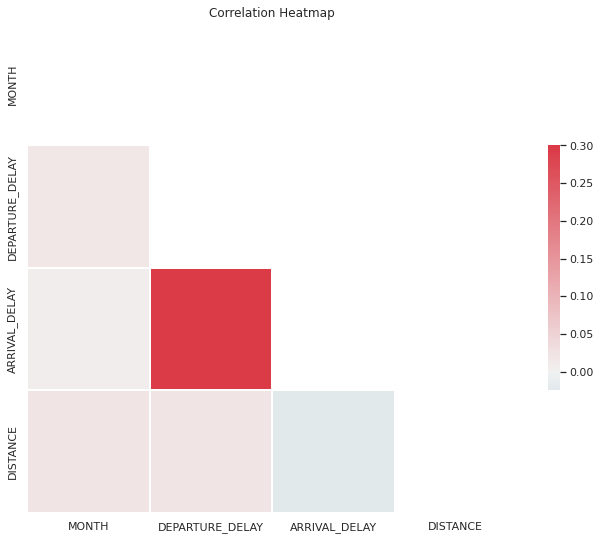

In [ ]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

#Part 4: XPath 


So far, we've looked at data on airport delays from 2015. Let's change our scope to look at delays from the summer of 2022! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [thepointsguy.co.uk](https://thepointsguy.co.uk/news/worst-uk-airlines-airports-cancellations-summer-2022), we have a table with UK delays by airline. 

We get the DOM tree for you below.

In [ ]:
# Request the data and build the DOM tree (we've done this for you!)
w = requests.get("https://thepointsguy.co.uk/news/worst-uk-airlines-airports-cancellations-summer-2022/")
dom_tree = html.fromstring(w.content)
print(dom_tree)

<Element html at 0x7fb0738b7350>


## 4.1: Update dom_tree to get only the airline table 

Note the webpage has two tables. To find both of these tables we can use the xpath `//table/*`

In [ ]:
dom_tree.xpath("//table/*")

[<Element tbody at 0x7fb0738b77d0>, <Element tbody at 0x7fb0738b7830>]

We are only interested in the table with the airline information (second table). 
TODO:
- Create `updated_dom_tree` to contain the tbody element of the airline table.
- Use `updated_dom_tree` to complete the below questions 

**Hint**: What does each index of the above xpath search contain? 

In [ ]:
# TODO: make updated_dom_tree equal to the correct table element
updated_dom_tree = dom_tree.xpath("//table[2]/*")
print(updated_dom_tree)

[<Element tbody at 0x7fb0738b7830>]


## 4.2 Airline Names 

TODO: Create `x_path_airline_name` and `airline_names`.

`x_path_airline_name` should be the value you pass in for dom_tree.xpath() to retrive names of the 10 airlines.

It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!).

Hint: Since we updated the dom tree to start at the table we don't need '/.../table', we can instead start the xpath with the next element after 'table' we want. It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!)

You can use the 'inspect' tool on the website and see the various html tags and labels, to figure out how we generate the Xpath for the table!

Your job is to go into several more steps to get the text content of one column of each row, to get the entire `x_path_airline_name` string

Return `airline_names` which is a list with all the airline names. Be sure to remove any new line characters, the output should match the 10 airlines in the table on the website.

In [ ]:
# TODO: Define the xpath string

x_path_airline_name = '//tbody/tr/td[1]/a/text()'

# TODO: Create airline names
airline_names = dom_tree.xpath('//table[2]//tbody/tr/td[1]/text()')[2:]
airline_names

['easyJet',
 'Loganair',
 'KLM Cityhopper',
 'BA Cityflyer',
 'British Airways',
 'Eastern Airways',
 'Wizz Air',
 'TUI Airways',
 'SAS',
 'Lufthansa']

## 4.3 Total Cancelled Flights 
TODO: Create `x_path_total` and `total_cancellations`

This should be very similar to scraping names. Change the xpath accordingly to get the Total column of the table into a list! 

`x_path_total` is the xpath string to pass into dom_tree.xpath() to retrive total cancellations of the 10 airlines.

`total_cancellations` is total cancellations. Elements in this list should be ints.

In [ ]:
# TODO: Define the xpath string
#x_path_total = dom_tree.xpath('//table[2]//tbody/tr/td[2]/text()')

# TODO: Create total_cancellations list
total_cancellations = dom_tree.xpath('//table[2]//tbody/tr/td[4]/text()')[2:]
total_cancellations = [int(x) for x in total_cancellations]

In [ ]:
total_cancellations

[932, 147, 113, 99, 96, 53, 47, 46, 23, 18]

## 4.4 Putting it together! 

Create a dataframe called `cancellations_df` by using the `airline_names` and `total_cancellations` lists that you created in 4.1 and 4.2.

The dataframe should have 2 columns. The first should be called `airline_name`. The second should be called `total_cancellations`. The data for these columns should come from the lists.

In [ ]:
# TODO: Create cancellations_df
cancellations_df = {'airline_name': airline_names, 'total_cancellations': total_cancellations}
cancellations_df = pd.DataFrame(cancellations_df)
cancellations_df

,airline_name,total_cancellations
0,easyJet,932
1,Loganair,147
2,KLM Cityhopper,113
3,BA Cityflyer,99
4,British Airways,96
5,Eastern Airways,53
6,Wizz Air,47
7,TUI Airways,46
8,SAS,23
9,Lufthansa,18


## 4.5 Summary Statistics 

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `total_cancellations` column and save the summary to `cancellation_stats`

In [ ]:
# TODO: Create cancellations_stats
cancellation_stats = cancellations_df['total_cancellations'].describe()